In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [24]:
path = pathlib.Path('/Users/singhalmanik/Code/Datasets/keras-multi-label/dataset/')
path

PosixPath('/Users/singhalmanik/Code/Datasets/keras-multi-label/dataset')

In [42]:
#labels for path
def labelList(path):
    #print(path)
    comp = path.parts
    return comp[-2].split('_')

In [43]:

np.random.seed(42)
src = (ImageItemList.from_folder(path, extensions=['.jpg', '.jpeg', '.png'])
      .random_split_by_pct(0.2)
        .label_from_func(func = labelList)
      )
src

LabelLists;

Train: LabelList
y: MultiCategoryList (1732 items)
[MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset
x: ImageItemList (1732 items)
[Image (3, 2796, 1945), Image (3, 1080, 810), Image (3, 1080, 810), Image (3, 1666, 1000), Image (3, 1666, 1000)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset;

Valid: LabelList
y: MultiCategoryList (433 items)
[MultiCategory black;jeans, MultiCategory black;jeans, MultiCategory black;jeans, MultiCategory red;shirt, MultiCategory black;jeans]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset
x: ImageItemList (433 items)
[Image (3, 1380, 920), Image (3, 2667, 2000), Image (3, 2240, 1920), Image (3, 1338, 1100), Image (3, 1425, 1425)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset;

Test: None

In [47]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
bs = 32

In [48]:
data = (src.transform(tfms, size=128)
        .databunch(bs=bs).normalize(imagenet_stats)
       )

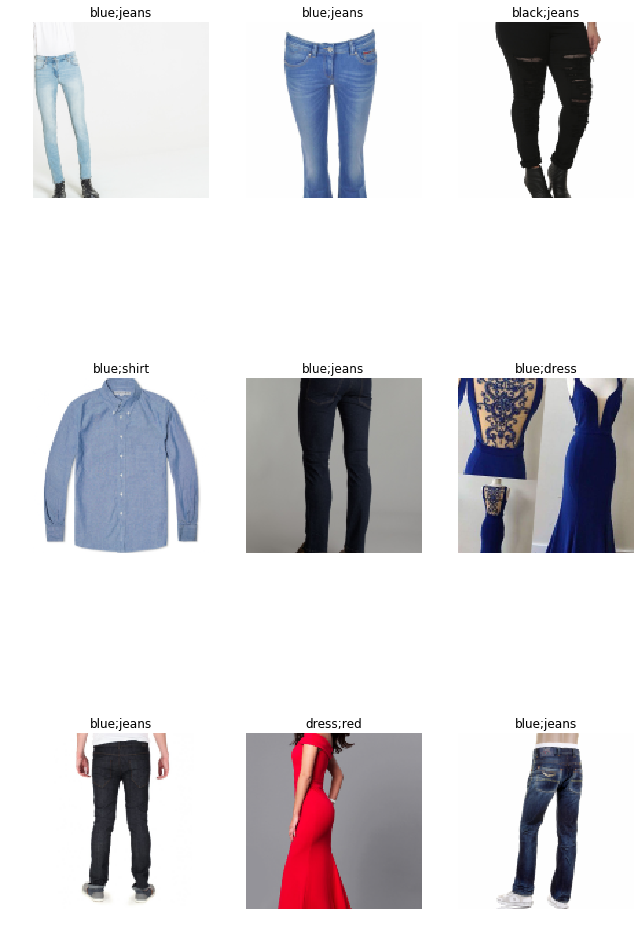

In [46]:
data.show_batch(3, figsize=(9,16))

In [50]:
arch = models.resnet34

In [51]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
learner = create_cnn(data, arch, metrics=acc_02)

In [52]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


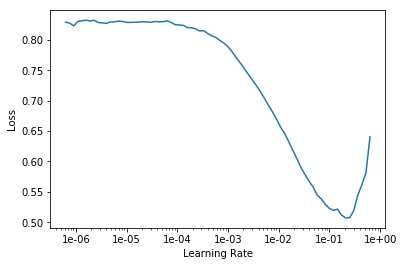

In [53]:
learner.recorder.plot()

In [54]:
lr = 0.01

In [55]:
learner.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh
1,0.321301,0.060895,0.965743
2,0.156233,0.049312,0.978830
3,0.101792,0.027871,0.986143
4,0.064876,0.020927,0.988838
5,0.047178,0.020954,0.989607


In [56]:
learner.save('dress-1-res34')

In [57]:
learner.unfreeze

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList
y: MultiCategoryList (1732 items)
[MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset
x: ImageItemList (1732 items)
[Image (3, 2796, 1945), Image (3, 1080, 810), Image (3, 1080, 810), Image (3, 1666, 1000), Image (3, 1666, 1000)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset;

Valid: LabelList
y: MultiCategoryList (433 items)
[MultiCategory black;jeans, MultiCategory black;jeans, MultiCategory black;jeans, MultiCategory red;shirt, MultiCategory black;jeans]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset
x: ImageItemList (433 items)
[Image (3, 1380, 920), Image (3, 2667, 2000), Image (3, 2240, 1920), Image (3, 1338, 1100), Image (3, 1425, 1425)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset;

Test: N

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


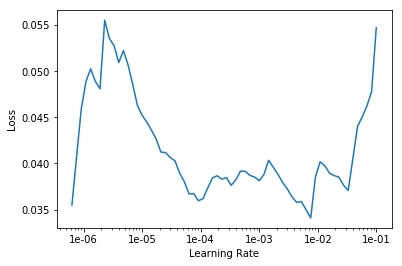

In [58]:
learner.lr_find()
learner.recorder.plot()

In [60]:
learner.fit_one_cycle(5, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh
1,0.031193,0.021096,0.989607
2,0.036347,0.016658,0.991147
3,0.032363,0.017735,0.991147
4,0.027200,0.018565,0.990762
5,0.029097,0.016197,0.991532


In [61]:
learner.save('dress-2-res34')

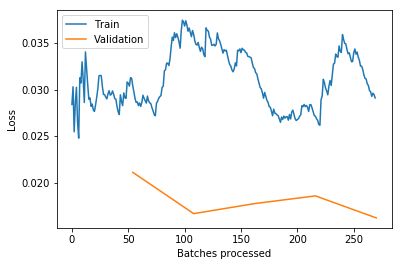

In [62]:
learner.recorder.plot_losses()

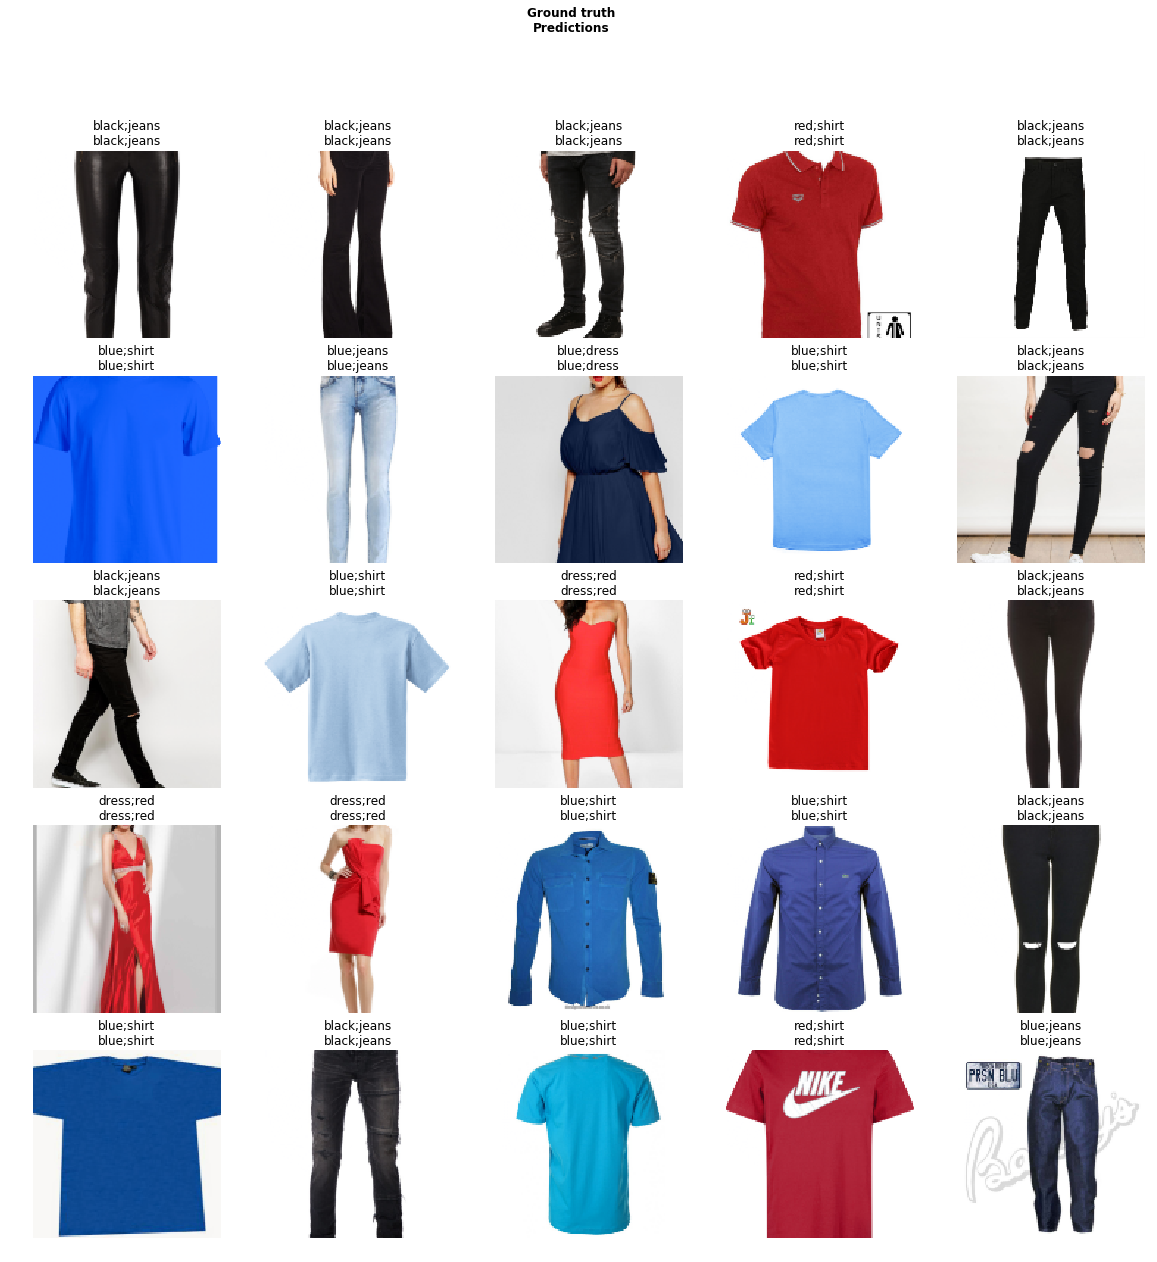

In [63]:
learner.show_results()

In [64]:
learner.summary()

'======================================================================\nLayer (type)         Output Shape         Param #    Trainable \n======================================================================\nConv2d               [32, 64, 64, 64]     9408       False     \n______________________________________________________________________\nBatchNorm2d          [32, 64, 64, 64]     128        True      \n______________________________________________________________________\nReLU                 [32, 64, 64, 64]     0          False     \n______________________________________________________________________\nMaxPool2d            [32, 64, 32, 32]     0          False     \n______________________________________________________________________\nConv2d               [32, 64, 32, 32]     36864      False     \n______________________________________________________________________\nBatchNorm2d          [32, 64, 32, 32]     128        True      \n________________________________________

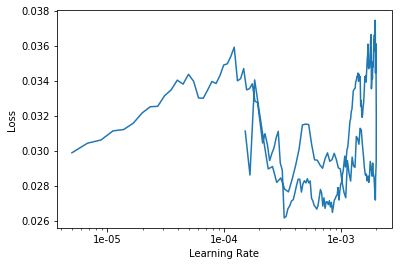

In [67]:
learner.recorder.plot()

In [69]:
interep = ClassificationInterpretation.from_learner(learner)
interep.top_losses()

(tensor([2.7729, 1.9644, 1.6623,  ..., 0.0000, 0.0000, 0.0000]),
 tensor([ 719, 2168, 1283,  ..., 1282,  730,  657]))

(MultiCategory blue;dress,
 tensor([0., 1., 1., 0., 0., 0.]),
 tensor([2.1402e-05, 9.9997e-01, 9.9998e-01, 5.4158e-06, 3.6696e-05, 2.9269e-05]))

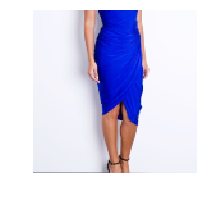

In [81]:
img = learner.data.train_ds[800][0]
show_image(img)
learner.predict(img)

In [85]:
learner.export('dress-resnet34')

In [101]:
test_path = Path('/Users/singhalmanik/Code/Datasets/keras-multi-label/examples/new')
test = ImageItemList.from_folder(test_path)
len(test)


5

In [102]:
#learner.data.test_ds = test
learn2 = load_learner(path, fname='dress-resnet34', test=test)
preds, _ = learn2.get_preds(ds_type=DatasetType.Test)

In [103]:
learn2.data.test_ds

LabelList
y: EmptyLabelList (5 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (5 items)
[Image (3, 225, 225), Image (3, 275, 183), Image (3, 1140, 760), Image (3, 241, 209), Image (3, 995, 850)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset

In [99]:
thresh = 0.2
labelled_preds = [' '.join([learn2.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [100]:
labelled_preds[:]

['blue dress', 'blue shirt', 'blue shirt']